 Exercise 1 : Understanding the problem and Data Collection
We want to predict if an individual will have diabetes.

Load the diabetes dataset and explore it.
How many positive and negative cases is there ?
Split the data into training and testing sets


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
try:
  df = pd.read_csv('12.csv')
except FileNotFoundError:
  print("Error: 'diabetes.csv' not found. Please upload the dataset or provide the correct file path.")
  exit()
print(df.head())
print(df.info())
print(df.describe())
print(df.columns)
# Count positive and negative cases
positive_cases = df[df['heart_disease'] == 1].shape[0]
negative_cases = df[df['heart_disease'] == 0].shape[0]

print(f"\nPositive cases: {positive_cases}")
print(f"Negative cases: {negative_cases}")

# Separate features (X) and target (y)
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")



🌟 Exercise 2 : Model Picking and Standardization
Which classification model can we use in this problem and why ?
Do we need to standardize the data ? If yes, use .StandardScaler()


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
encoder=LabelEncoder()
X_train['gender'] = encoder.fit_transform(X_train['gender'])
X_test['gender'] = encoder.fit_transform(X_test['gender'])

encoder_smoking =OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_smoking_train = encoder_smoking.fit_transform(X_train[['smoking_history']])
encoded_smoking_test = encoder_smoking.transform(X_test[['smoking_history']])

# Get feature names from OneHotEncoder
smoking_feature_names = encoder_smoking.get_feature_names_out(['smoking_history'])

# Create DataFrames from encoded smoking data
encoded_smoking_train_df = pd.DataFrame(encoded_smoking_train, columns=smoking_feature_names, index=X_train.index)
encoded_smoking_test_df = pd.DataFrame(encoded_smoking_test, columns=smoking_feature_names, index=X_test.index)
# Concatenate encoded smoking data with original DataFrames
X_train = pd.concat([X_train.drop('smoking_history', axis=1), encoded_smoking_train_df], axis=1)
X_test = pd.concat([X_test.drop('smoking_history', axis=1), encoded_smoking_test_df], axis=1)


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


 Exercise 3 : Model Training
We will use, the logistic regression model, Train it.


In [ ]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

 Exercise 4 : Evaluation Metrics
Plot the accuracy score and comment the results.
Plot the confusion matrix and comment the results.
Plot the Recall, precision, F1-score and comment the results.


Accuracy: 0.96145


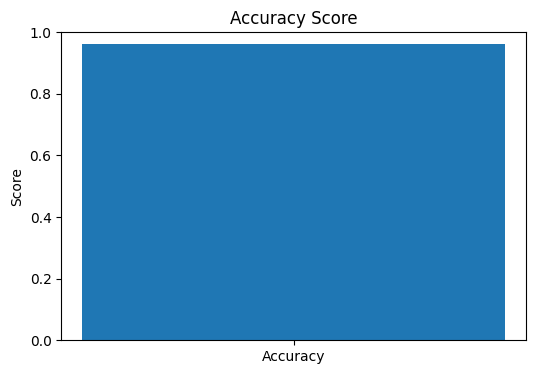

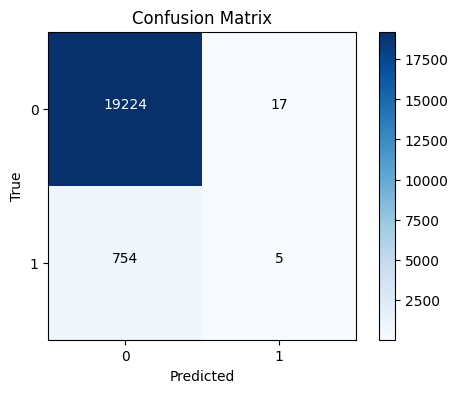

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     19241
           1       0.23      0.01      0.01       759

    accuracy                           0.96     20000
   macro avg       0.59      0.50      0.50     20000
weighted avg       0.93      0.96      0.94     20000



In [57]:

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot the accuracy score
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy])
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.ylabel('Score')
plt.title('Accuracy Score')
plt.show()


# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])

# Add labels to the confusion matrix
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))


Exercise 5 : Visualizing the performance of our model
Visualize the decision boundary with accuracy information.


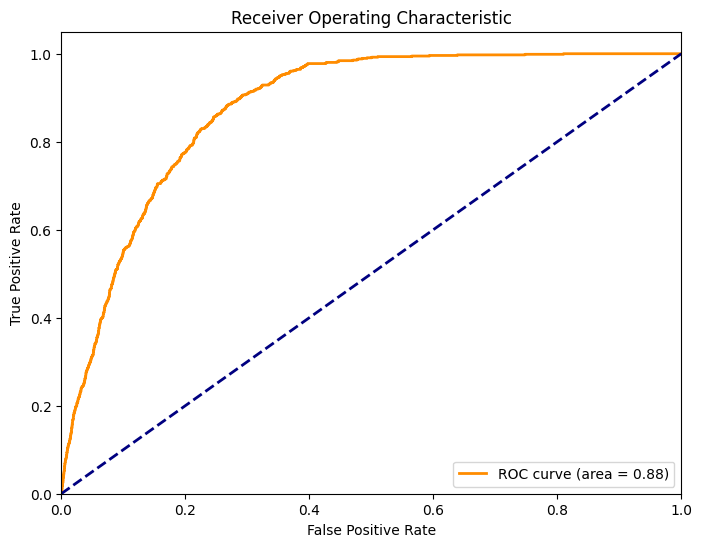

ValueError: All arrays must be of the same length

In [63]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

y_prob = logreg_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

feature_names = df.drop('heart_disease', axis=1).columns

# Get the coefficients (weights
feature_importance = logreg_model.coef_[0]

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()


Exercise 6 : ROC Curve
Plot the ROC Curve using this code template available on this link


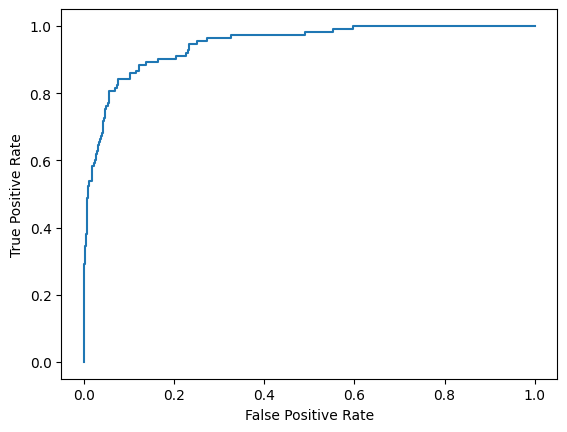

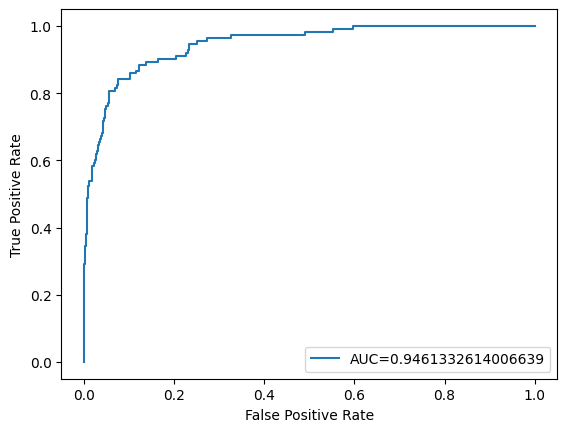

In [70]:
from sklearn import metrics
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()